In [ ]:
%pip install gradio tensorflow scikit-learn torchvision seaborn

In [2]:
import gradio as gr 
from sklearn.neural_network import MLPClassifier 
import torchvision.datasets as datasets 
import seaborn as sns 

#dark mode seaborn 
sns.set_style("darkgrid")

/Users/bkoo/Documents/Development/AIProjects/GradioMNIST/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [5]:
print(mnist_trainset.data.shape)
print(mnist_testset.data.shape)
print(mnist_trainset.targets.shape)
print(mnist_testset.targets.shape)


torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([60000])
torch.Size([10000])


In [6]:
X_train = mnist_trainset.data
y_train = mnist_trainset.targets
X_test = mnist_testset.data
y_test = mnist_testset.targets


In [7]:
X_train = X_train.numpy() 
X_test = X_test.numpy()
y_train = y_train.numpy()
y_test = y_test.numpy()

<Axes: ylabel='Count'>

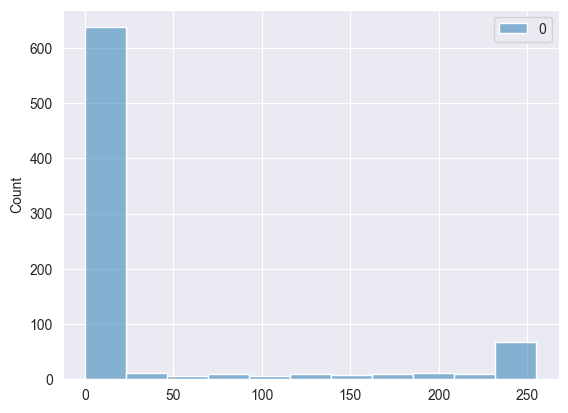

In [8]:
sns.histplot(data = X_train[0].reshape(784,1))


<Axes: >

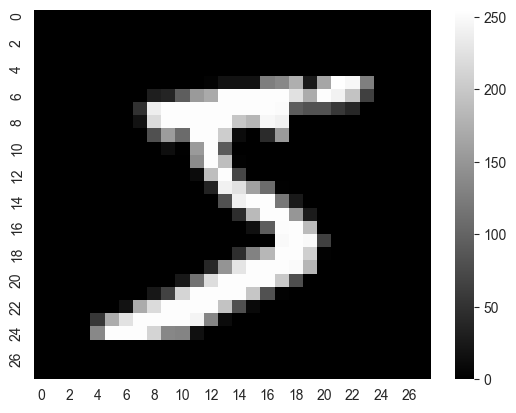

In [9]:
#plot the first image 
sns.heatmap(X_train[0], cmap = "gray")


In [10]:
X_train = X_train.reshape(60000, 784)/255.0
X_test = X_test.reshape(10000, 784)/255.0


In [11]:
#train the model 
mlp = MLPClassifier(hidden_layer_sizes=(32,32))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 32))

In [27]:
#print the accuracies 
print("Training Accuracy: ", mlp.score(X_train, y_train))
print("Testing Accuracy: ", mlp.score(X_test, y_test))


Training Accuracy:  1.0
Testing Accuracy:  0.9699


In [31]:
def predict(img):
    img = img.shape(1,784)/255.0
    prediction = mlp.predict(img)[0]
    return int(prediction)


In [29]:
def recognize_digit(image):
    if image is not None:
        image = image.reshape((1, 28, 28, 1)).astype('float32') / 255
        prediction = model.predict(image)
        return {str(i): float(prediction[0][i]) for i in range(10)} 
    else:
        return ''

In [1]:
gr.Interface(
    fn= predict, 
    inputs = gr.Image(shape=(28,28), image_mode='L', invert_colors=True, source='sketchpad'), 
    outputs ="label").launch()

NameError: name 'gr' is not defined

In [38]:

# Create interface
iface = gr.Interface(
  fn=predict,
  inputs=gr.Image(reshape=(28,28)),
  outputs='label'
)


TypeError: Image.__init__() got an unexpected keyword argument 'reshape'

In [39]:
import gradio as gr
import numpy as np

def predict(img):
  # Model expects 28x28 input
  img = img.reshape(28, 28)  
  # Make prediction
  prediction = model.predict(img)
  return prediction

iface = gr.Interface(
  fn=predict,
  inputs=gr.Image(shape=(112, 112), image_mode='L'), 
  outputs='label'
)

def reshape_image(img):
  # Gradio gives 112x112 image
  img = img['image']
  
  # Reshape to 28x28
  img = img.reshape(28, 28)
  
  return predict(img)

iface.launch(reshape_image)

TypeError: Image.__init__() got an unexpected keyword argument 'shape'

In [44]:
import gradio as gr
import numpy as np
from PIL import Image

def predict(img):
    # Expects grayscale 28x28 image
    img = img.shape(1,784)/255.0
    prediction = mlp.predict(img)[0]
    return int(prediction)

iface = gr.Interface(
  fn=predict,
  inputs=gr.Sketchpad(),
  outputs='label'
)

def process_sketchpad(sketch):
  # Get sketch image
  img = sketch['image']
  
  # Convert to PIL Image
  img = Image.fromarray(img) 
  
  # Convert to grayscale
  img = img.convert('L')
  
  # Convert back to numpy array
  img = np.array(img)
  
  # Reshape to 28x28
  img = img.reshape(28, 28)
  
  return predict(img)

iface.launch(process_sketchpad)

Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/bkoo/Documents/Development/AIProjects/GradioMNIST/.venv/lib/python3.10/site-packages/gradio/queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
  File "/Users/bkoo/Documents/Development/AIProjects/GradioMNIST/.venv/lib/python3.10/site-packages/gradio/route_utils.py", line 235, in call_process_api
    output = await app.get_blocks().process_api(
  File "/Users/bkoo/Documents/Development/AIProjects/GradioMNIST/.venv/lib/python3.10/site-packages/gradio/blocks.py", line 1627, in process_api
    result = await self.call_function(
  File "/Users/bkoo/Documents/Development/AIProjects/GradioMNIST/.venv/lib/python3.10/site-packages/gradio/blocks.py", line 1173, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/Users/bkoo/Documents/Development/AIProjects/GradioMNIST/.venv/lib/python3.10/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_